# Imports and setting up viz

NB : conda env1 on PC, lam1env on spirit (Python3.12)

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

#import personnal tools
import sys
sys.path.append('../../python_tools/')
from tools import *
from tools_mapping import *
from tools_routing import *

In [3]:
rivers = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m',edgecolor=(0, 0, 0, 0.3), facecolor='none')

# Figures

## Domain and altitude

In [4]:
import psyplot.project as psy
psy.rcParams['auto_show'] = True
mpl.rcParams['figure.figsize'] = [8, 6.]

In [5]:
LAM_dir='../../../JZ_simu_outputs/LAM/native_outputs/'
start_file='{}/espagne_start_2010.nc'.format(LAM_dir)
start=xr.open_dataset(start_file)
# start

In [6]:
start["Altitude"] = start["phis"]/9.81
start["Altitude"].attrs["units"] = "m"
start["Altitude"].attrs["long_name"] = "Altitude"
start["Altitude"].attrs["standard_name"] = "Altitude"

start_file2='{}/espagne_start_2010_modified.nc'.format(LAM_dir)
start.to_netcdf(start_file2)

In [7]:
start2=xr.open_dataset(start_file2)
# start2

In [8]:
# Custom colormap
terrain_colors = plt.cm.terrain(np.linspace(0, 1, 25))
filtered_colors = terrain_colors[5:]  
# Insert blue as the first color
filtered_colors = np.vstack([[0.07973856209150328, 0.44052287581699345, 0.8405228758169935, 1.0], filtered_colors]) 
custom_colormap = ListedColormap(filtered_colors)


Figure saved as 'figures/altitude_map.png'


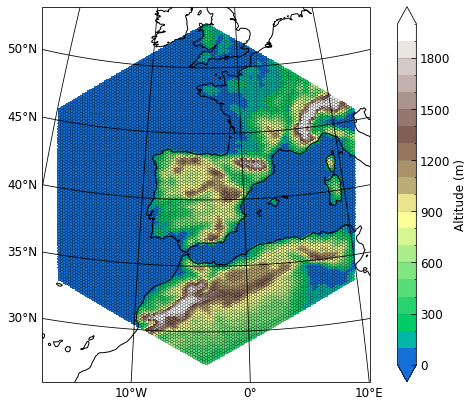

In [9]:
savefig=True
file=start_file2
var='Altitude'
vmin=-0
vmax=2000
pas=(vmax-vmin) / 20

map=psy.plot.mapplot(
    file, 
    name=var,
    datagrid=dict(color='k', linewidth=0.2),
    cbar='r',
    tight=True,
    lsm='50m',
    cmap=custom_colormap,
    extend='both',
    projection='ortho',
    xgrid=True,ygrid=True,
    bounds=np.arange(vmin, vmax + pas, pas),
    # title=var,
    clabel="Altitude (m)"
)

if savefig:
    plt.savefig('figures/methods/altitude_map.png', dpi=300, bbox_inches='tight')
    print("Figure saved as 'figures/altitude_map.png'")

## Irrigated fraction and AEI_SW

In [10]:
savefig=True

In [11]:
irr_dir='../../../JZ_simu_outputs/LAM/LAM_1500_60/irr'
filename='{}/*/SRF/MO/*2013*history.nc'.format(irr_dir)

ORCirr0 = xr.open_mfdataset(filename)
ORCirr = ORCirr0.rename({'time_counter':'time'})
ORCirr.attrs['name'] = 'irr'
ORCirr.attrs['plot_color'] = "#0C5DA5"
ORCirr = ORCirr.sel(lon=slice(lon_min,lon_max),lat=slice(lat_min,lat_max))

ORCirr['irrig_frac'] = ORCirr['irrigmap_dyn'] / ORCirr['Areas'] * 100
ORCirr['irrig_frac'].attrs['units'] = '%'
ORCirr['irrig_frac'].attrs['long_name'] = 'Irrigated fraction'

ORCirr['aei_sw'] = ORCirr['aei_sw'] * 100

ORCirr

<xarray.Dataset> Size: 45MB
Dimensions:                 (time: 14, axis_nbounds: 2, lat: 35, lon: 49,
                             veget: 15, soiltyp: 3, solth: 18, nobio: 1,
                             solay: 11, snowlev: 3, albtyp: 2)
Coordinates:
  * lat                     (lat) float32 140B 35.69 35.93 36.17 ... 43.62 43.87
  * lon                     (lon) float32 196B -9.899 -9.615 ... 3.468 3.752
  * veget                   (veget) float32 60B 1.0 2.0 3.0 ... 13.0 14.0 15.0
  * soiltyp                 (soiltyp) float32 12B 1.0 2.0 3.0
  * solth                   (solth) float32 72B 0.0004888 0.001955 ... 65.56
  * nobio                   (nobio) float32 4B 1.0
  * solay                   (solay) float32 44B 0.0 0.001955 ... 0.999 2.0
  * snowlev                 (snowlev) float32 12B 1.0 2.0 3.0
  * albtyp                  (albtyp) float32 8B 1.0 2.0
    time_centered           (time) datetime64[ns] 112B dask.array<chunksize=(1,), meta=np.ndarray>
  * time                    (time) datetime64[ns] 112B 2012-01-16T12:00:00 .....
Dimensions without coordinates: axis_nbounds
Data variables: (12/131)
    time_centered_bounds    (time, axis_nbounds) datetime64[ns] 224B dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds     (time, axis_nbounds) datetime64[ns] 224B dask.array<chunksize=(1, 2), meta=np.ndarray>
    Areas                   (time, lat, lon) float32 96kB dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    Contfrac                (time, lat, lon) float32 96kB dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    swnet                   (time, lat, lon) float32 96kB dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    lwnet                   (time, lat, lon) float32 96kB dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    ...                      ...
    delfastr_daily          (time, lat, lon) float32 96kB dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    delslowr_daily          (time, lat, lon) float32 96kB dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    delstreamr_daily        (time, lat, lon) float32 96kB dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    delstock_routing_daily  (time, lat, lon) float32 96kB dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    soilalb_bg              (time, albtyp, lat, lon) float32 192kB dask.array<chunksize=(1, 2, 35, 49), meta=np.ndarray>
    irrig_frac              (time, lat, lon) float32 96kB dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
Attributes:
    name:         irr
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Oct-25 04:30:23 GMT
    uuid:         cb7a5117-98ea-47fb-8a69-cfdcc4269361
    plot_color:   #0C5DA5

In [12]:
filename = '{}/*/ATM/MO/*2013*.nc'.format(irr_dir)


lmdz = xr.open_mfdataset(filename)
lmdz = lmdz.rename({'time_counter':'time'})
lmdz = lmdz.sel(lon=slice(lon_min, lon_max),lat=slice(lat_min, lat_max))

lmdz

<xarray.Dataset> Size: 60MB
Dimensions:               (time: 14, axis_nbounds: 2, lat: 35, lon: 49,
                           presnivs: 79)
Coordinates:
  * lat                   (lat) float32 140B 35.69 35.93 36.17 ... 43.62 43.87
  * lon                   (lon) float32 196B -9.899 -9.615 -9.33 ... 3.468 3.752
  * presnivs              (presnivs) float32 316B 1.012e+05 1.009e+05 ... 1.483
    time_centered         (time) datetime64[ns] 112B dask.array<chunksize=(1,), meta=np.ndarray>
  * time                  (time) datetime64[ns] 112B 2012-01-16T12:00:00 ... ...
    time_instant          (time) datetime64[ns] 112B dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds
Data variables: (12/80)
    time_centered_bounds  (time, axis_nbounds) datetime64[ns] 224B dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds   (time, axis_nbounds) datetime64[ns] 224B dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_instant_bounds   (time, axis_nbounds) datetime64[ns] 224B dask.array<chunksize=(1, 2), meta=np.ndarray>
    phis                  (time, lat, lon) float32 96kB dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    aire                  (time, lat, lon) float32 96kB dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    contfracATM           (time, lat, lon) float32 96kB dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    ...                    ...
    vitv                  (time, presnivs, lat, lon) float32 8MB dask.array<chunksize=(1, 79, 35, 49), meta=np.ndarray>
    vitw                  (time, presnivs, lat, lon) float32 8MB dask.array<chunksize=(1, 79, 35, 49), meta=np.ndarray>
    temp                  (time, presnivs, lat, lon) float32 8MB dask.array<chunksize=(1, 79, 35, 49), meta=np.ndarray>
    ovap                  (time, presnivs, lat, lon) float32 8MB dask.array<chunksize=(1, 79, 35, 49), meta=np.ndarray>
    geoph                 (time, presnivs, lat, lon) float32 8MB dask.array<chunksize=(1, 79, 35, 49), meta=np.ndarray>
    pres                  (time, presnivs, lat, lon) float32 8MB dask.array<chunksize=(1, 79, 35, 49), meta=np.ndarray>
Attributes:
    name:         histmth
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Oct-25 04:56:09 GMT
    uuid:         a39e8c33-80d1-482a-ba13-72e95ae74286

In [13]:
ip_mask = polygon_to_mask(ORCirr, iberian_peninsula)
con_mask=lmdz.mean(dim='time')['contfracOR']>0.95

ip_ORCirr = ORCirr.where(ip_mask, drop=True)
contIP_ORCirr = ip_ORCirr.where(con_mask)

/home/ptiengou/miniconda3/envs/lam1env/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


Figure saved


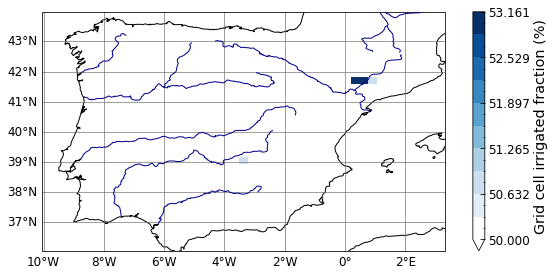

In [14]:
var='irrig_frac'
vmin=0
vmax=50
# vmin, vmax = None, None  # Use default min/max for the colormap
ds=contIP_ORCirr
map_ave(ds, var, vmin, vmax, cmap=bluesW,
        title='off', clabel='Grid cell irrigated fraction (%)')
if savefig:
        plt.savefig('figures/methods/irrigated_fraction_map.png', dpi=300, bbox_inches='tight')
        print("Figure saved")

/home/ptiengou/miniconda3/envs/lam1env/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


Figure saved


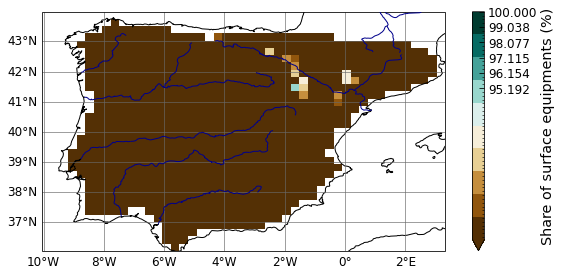

In [15]:
var='aei_sw'
vmin=0
vmax=100
# vmin, vmax = None, None  # Use default min/max for the colormap
ds=contIP_ORCirr
map_ave(ds, var, vmin, vmax, cmap=emb_neutral,
        title='off', clabel='Share of surface equipments (%)')
if savefig:
        plt.savefig('figures/methods/aei_sw_map.png', dpi=300, bbox_inches='tight')
        print("Figure saved")

/home/ptiengou/miniconda3/envs/lam1env/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


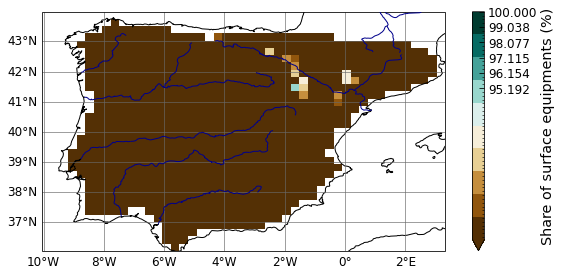

In [16]:
var='aei_sw'
vmin=0
vmax=100
# vmin, vmax = None, None  # Use default min/max for the colormap
ds=contIP_ORCirr
map_ave(ds, var, vmin, vmax, cmap=emb_neutral,
        title='off', clabel='Share of surface equipments (%)')

## Routing DEM

In [17]:
filename='../../../input_data/routing.nc'
std_halfdeg = xr.open_dataset(filename)
#remap y axis, from (0,359) it should be (90N,90S)
std_halfdeg = std_halfdeg.rename({'y': 'lat'})
std_halfdeg = std_halfdeg.assign_coords(lat=89.75 - std_halfdeg.lat/2) 

#remap x axis, from (0,719) it should be (-180,180)
std_halfdeg = std_halfdeg.rename({'x': 'lon'})
std_halfdeg = std_halfdeg.assign_coords(lon=std_halfdeg.lon/2 -179.75)  

#select Iberian Peninsula zone
std_halfdeg = std_halfdeg.sel(lon=slice(lon_min, lon_max), lat=slice(lat_max, lat_min))

std_halfdeg

<xarray.Dataset> Size: 10kB
Dimensions:  (lat: 17, lon: 28)
Coordinates:
  * lat      (lat) float64 136B 43.75 43.25 42.75 42.25 ... 36.75 36.25 35.75
  * lon      (lon) float64 224B -9.75 -9.25 -8.75 -8.25 ... 2.25 2.75 3.25 3.75
Data variables:
    nav_lon  (lat, lon) float32 2kB ...
    nav_lat  (lat, lon) float32 2kB ...
    trip     (lat, lon) float32 2kB ...
    basins   (lat, lon) float32 2kB ...
    topoind  (lat, lon) float32 2kB ...

In [18]:
filename='../../../input_data/routing_simple.nc'
interp_halfdeg = xr.open_dataset(filename)

#select Iberian Peninsula zone
interp_halfdeg = interp_halfdeg.sel(lon=slice(lon_min, lon_max), lat=slice(lat_max, lat_min))

interp_halfdeg


<xarray.Dataset> Size: 10kB
Dimensions:          (lat: 17, lon: 28)
Coordinates:
  * lat              (lat) float32 68B 43.75 43.25 42.75 ... 36.75 36.25 35.75
  * lon              (lon) float32 112B -9.75 -9.25 -8.75 ... 2.75 3.25 3.75
Data variables:
    trip             (lat, lon) float32 2kB ...
    trip_extended    (lat, lon) float32 2kB ...
    topoind          (lat, lon) float32 2kB ...
    basins           (lat, lon) float32 2kB ...
    basins_extended  (lat, lon) float32 2kB ...
Attributes:
    name:         routing_simple
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2022-Feb-16 12:19:07 GMT
    uuid:         b04f64e8-be96-416d-a197-5230bb388fe4
    description:  Extend of the standard routing.nc file to route riverflow t...

/home/ptiengou/miniconda3/envs/lam1env/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


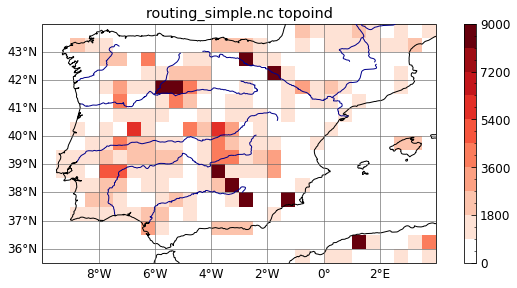

In [19]:
vmin, vmax=0,9000
# vmin, vmax=1,8
# vmin, vmax=None, None  # Use default min/max for the colormap
cmap=redsW
var='topoind'
map_plotvar(interp_halfdeg[var], vmin=vmin, vmax=vmax, title=f'routing_simple.nc {var}',
            cmap=cmap)

/home/ptiengou/miniconda3/envs/lam1env/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


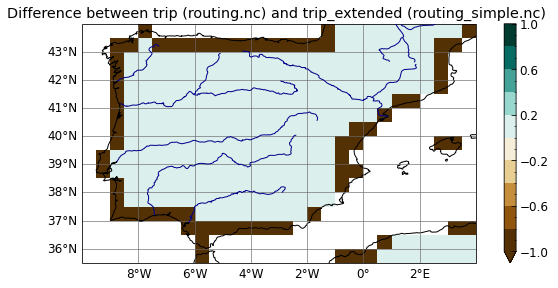

In [20]:
var1='trip'
var2='trip_extended'
# var2=var1
vmin=-1
vmax= 1
# vmin, vmax = None, None  # Use default min/max for the colormap
diff= interp_halfdeg['trip_extended'] - std_halfdeg[var1]
map_plotvar(diff, cmap=emb_neutral,
            vmin=vmin, vmax=vmax,
            title='Difference between trip (routing.nc) and trip_extended (routing_simple.nc) ')

In [21]:
filename='../../../input_data/routing_ext_merit.nc'
ext_halfdeg = xr.open_dataset(filename)
#select Iberian Peninsula zone
ext_halfdeg = ext_halfdeg.sel(lon=slice(lon_min, lon_max), lat=slice(lat_max, lat_min))
ext_halfdeg

<xarray.Dataset> Size: 5MB
Dimensions:        (lat: 510, lon: 840)
Coordinates:
  * lat            (lat) float32 2kB 43.99 43.97 43.96 ... 35.54 35.53 35.51
  * lon            (lon) float32 3kB -9.992 -9.975 -9.958 ... 3.958 3.975 3.992
Data variables:
    trip           (lat, lon) float32 2MB ...
    trip_extended  (lat, lon) float32 2MB ...
    topoind        (lat, lon) float32 2MB ...
Attributes:
    name:         routing_ext_50km
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2023-Jul-27 18:58:51 GMT
    uuid:         37660c29-b90e-4bd7-8125-6c4b10f4987c

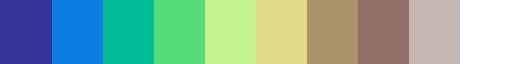

In [22]:
myterrain

In [23]:
test=ListedColormap(mpl.colormaps['terrain_r'](np.linspace(0, 1, 10)))

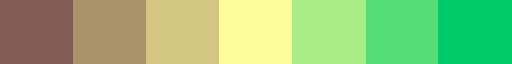

In [24]:
colors = mpl.colormaps['terrain_r'](np.linspace(0, 1, 13))  # 10 couleurs

# 2. Sélectionner les 8 premières couleurs (supprimer les 2 dernières)
colors_truncated = colors[3:10]

# 3. Créer une nouvelle ListedColormap avec les 8 couleurs
myterrain_r = ListedColormap(colors_truncated)
myterrain_r

/home/ptiengou/miniconda3/envs/lam1env/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


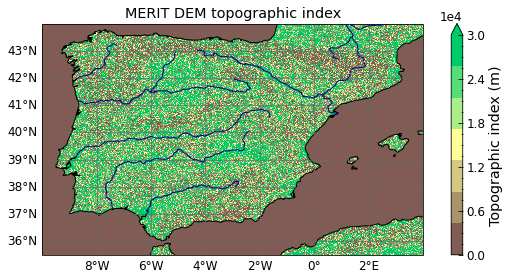

In [25]:
rivers = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '110m',edgecolor=(0, 0, 0, 0.3), facecolor='none')

vmin=0
vmax=30000
# vmin, vmax = None, None  # Use default min/max for the colormap
map_plotvar(ext_halfdeg['topoind'], 
            # cmap=test, 
            cmap=myterrain_r,
            vmin=vmin, vmax=vmax,
            title='MERIT DEM topographic index', clabel='Topographic index (m)')

# rivers = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m',edgecolor=(0, 0, 0, 0.3), facecolor='none')


/home/ptiengou/miniconda3/envs/lam1env/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


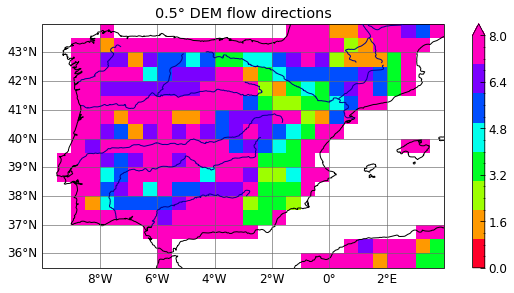

In [26]:
vmin, vmax=0,8
map_plotvar(std_halfdeg['trip'], vmin=vmin, vmax=vmax, cmap=myrainbow, title='0.5° DEM flow directions')

/home/ptiengou/miniconda3/envs/lam1env/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


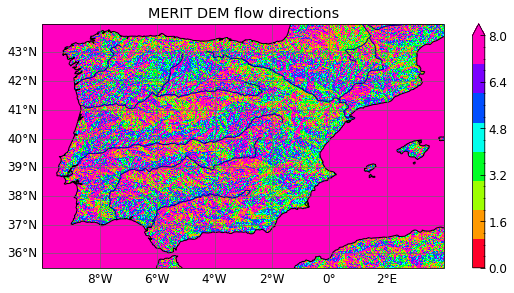

In [27]:
vmin=0
vmax=8
# vmin, vmax = None, None  # Use default min/max for the colormap
map_plotvar(ext_halfdeg['trip'], vmin=vmin, vmax=vmax, cmap=myrainbow, title='MERIT DEM flow directions')